In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dia=pd.read_csv('/content/data.csv')

In [28]:
dia.head()

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,50,6,148,72,35,0,33.6,627.000
1,31,1,85,66,29,0,26.6,351.000
2,32,8,183,64,0,0,23.3,672.000
3,21,1,89,66,23,94,28.1,167.000
4,33,0,137,40,35,168,43.1,2.288


In [29]:
dia.isnull().sum()

,0
Age,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0


In [30]:
dia.shape

(768, 8)

In [31]:
x=dia.iloc[:,[2,4,5]].values

In [32]:
print(x)

[[148  35   0]
 [ 85  29   0]
 [183   0   0]
 ...
 [121  23 112]
 [126   0   0]
 [ 93  31   0]]


In [33]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

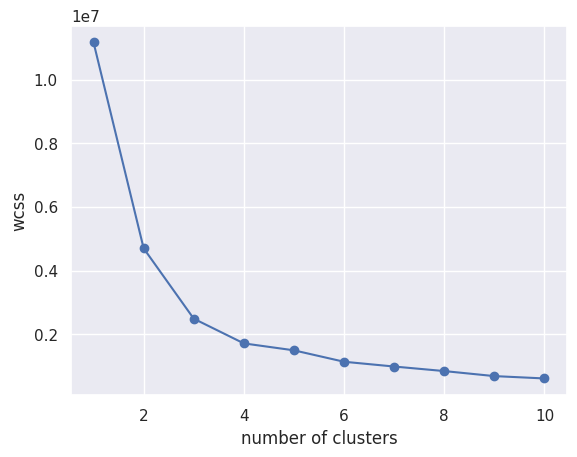

In [34]:
sns.set()
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [35]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [37]:
dia['Cluster']=y_kmeans

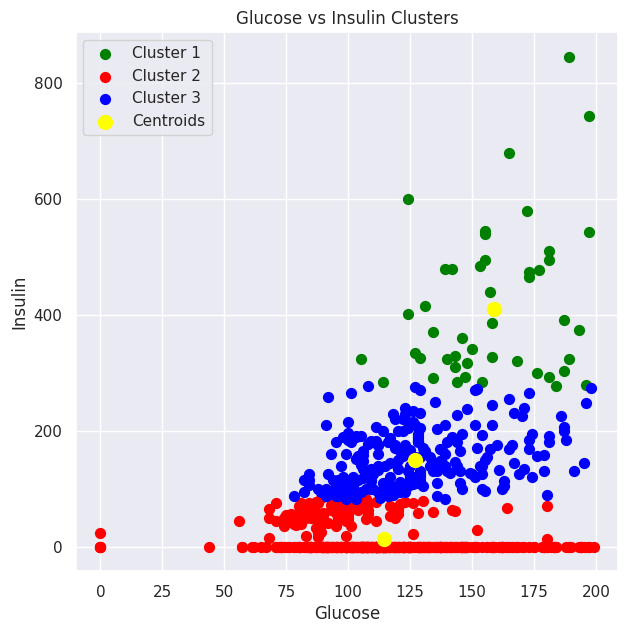

In [40]:
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,2],s=50,c="green",label="high risk")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,2],s=50,c="red",label="medium risk")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,2],s=50,c="blue",label="less risk")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c="yellow",label="Centroids")
plt.title("Glucose vs Insulin Clusters")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

In [39]:
# Display the data points belonging to Cluster 1 (green)
display(dia[dia['Cluster'] == 0])

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Cluster
8,53,2,197,70,45,543,30.5,158.000,0
13,59,1,189,60,23,846,30.1,398.000,0
53,58,8,176,90,34,300,33.7,467.000,0
54,42,7,150,66,42,342,34.7,718.000,0
56,41,7,187,68,39,304,37.7,254.000,0
111,46,8,155,62,26,495,34.0,543.000,0
139,28,5,105,72,29,325,36.9,159.000,0
144,23,4,154,62,31,284,32.8,237.000,0
153,23,1,153,82,42,485,40.6,687.000,0
162,27,0,114,80,34,285,44.2,167.000,0


In [41]:
# Display the data points belonging to Cluster 2 (blue)
display(dia[dia['Cluster'] == 2])

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Cluster
3,21,1,89,66,23,94,28.1,167.000,2
4,33,0,137,40,35,168,43.1,2.288,2
6,26,3,78,50,32,88,31.0,248.000,2
14,51,5,166,72,19,175,25.8,587.000,2
16,31,0,118,84,47,230,45.8,551.000,2
...,...,...,...,...,...,...,...,...,...
745,46,12,100,84,33,105,30.0,488.000,2
748,36,3,187,70,22,200,36.4,408.000,2
755,37,1,128,88,39,110,36.5,1.057,2
763,63,10,101,76,48,180,32.9,171.000,2
